In [ ]:
#LIDYA SIMON - THE SPARK FOUNDATION (GRIP) - DATA SCIENCE & BUSSINESS ANALYTICS INTERNSHIP 

#TASK 1 - Predict the score of a student who studies for 9.5 hrs/day

In [1]:
#IMPORTING LIBRARIES
#PANDAS,NUMPY for data manuplation.
#Matplotlib,seaborn module for Data exploration and Data Visualisation.
#sklearn for modelling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split #for train & test data split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#IMPORTING DATASET
scores=pd.read_csv("dataset.csv")
print("Load the data")

Load the data


In [3]:
scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print('Shape of the Dataset-->',scores.shape)
print ('Columns names -->',scores.columns)
print ('Columns Datatype -->', scores.dtypes)

Shape of the Dataset--> (25, 2)
Columns names --> Index(['Hours', 'Scores'], dtype='object')
Columns Datatype --> Hours     float64
Scores      int64
dtype: object


In [5]:
#Exploring data in the dataset for analysis

scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Finding null values to eliminate or data cleaning

scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

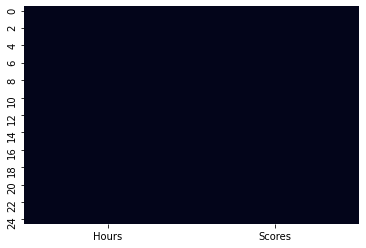

In [7]:
sns.heatmap(scores.isnull(), cbar=False)

In [ ]:
#OBSERVATION - NO DATA TO BE CLEANED OR NO NULL VALUE FOUND

In [8]:
#OUTLIERS

#percentile of each Predictors
scores.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


<AxesSubplot:>

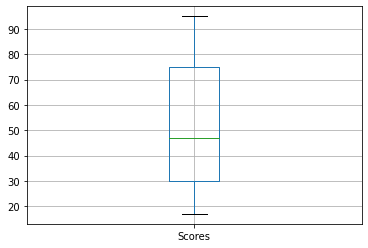

In [9]:
# to check the outliers in the data by plotting the boxplot
scores.boxplot(['Scores'])

<AxesSubplot:>

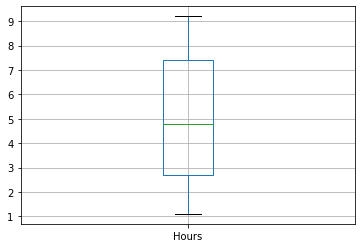

In [10]:
scores.boxplot(['Hours'])

In [ ]:
#OBSERVATION - NO MAJOR OUTLIERS TO BE TAKEN CARE OF

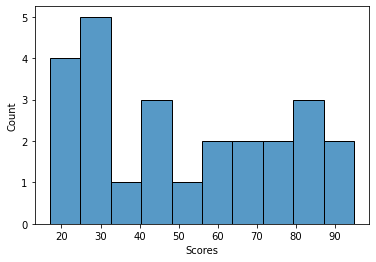

In [11]:
#DATA VISUALIZATION
#Visualizing Target variable Distribution

sns.histplot(scores['Scores'], bins=10)
plt.show()

In [ ]:
#In the above histogram, we can observe that Scores, there it is almost normally
#distributed with skew in the positive side Hence, we can perform a 
#LINEAR REGRESSION to predict the values

<AxesSubplot:>

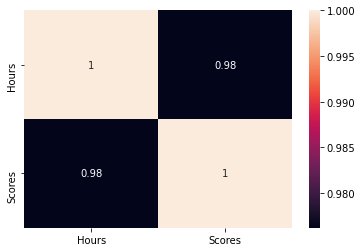

In [12]:
#correlation matrix

sns.heatmap(scores.corr(),annot=True)

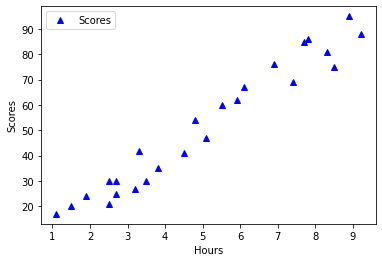

In [13]:
#Scattered plots

scores.plot(x = 'Hours', y = 'Scores', style = '^',color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#There is positive linear relationship between the number of hours studied and
#the scores obtained.

In [14]:
#Preparing the training data for Linear Regression
#Independent variable = Number of hours studied
#Dependent variable = Scores obtained

x = scores.drop("Scores" ,axis=1)
y = scores['Scores']

In [15]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [17]:
#Splitting the dataset into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [19]:
print("Hours 'trained' --> ",'\n', x_train,'\n')
print("Scores 'trained' --> ",'\n', y_train, '\n')
print("Hours 'tested' --> ",'\n', x_test, '\n')
print("Scores 'tested' --> ",'\n', y_test)

Hours 'trained' -->  
     Hours
12    4.5
22    3.8
4     3.5
10    7.7
5     1.5
19    7.4
1     5.1
2     3.2
7     5.5
21    4.8
20    2.7
18    6.1
11    5.9
24    7.8
13    3.3
15    8.9
8     8.3 

Scores 'trained' -->  
 12    41
22    35
4     30
10    85
5     20
19    69
1     47
2     27
7     60
21    54
20    30
18    67
11    62
24    86
13    42
15    95
8     81
Name: Scores, dtype: int64 

Hours 'tested' -->  
     Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9
9     2.7
3     8.5
16    2.5 

Scores 'tested' -->  
 14    17
0     21
17    24
6     88
23    76
9     25
3     75
16    30
Name: Scores, dtype: int64


In [20]:
#Training Linear Regression Model
scores_reg = LinearRegression()
scores_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
scores_reg

LinearRegression()

In [33]:
#predicting hours --> data - test 
y_pred = scores_reg.predict(x_test)
#hours tested
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

In [25]:
#Evaluating Train and Test scores

print('Training Score : ', scores_reg.score(x_train, y_train))
print('Test Score : ', scores_reg.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


In [40]:
#Comparing Actual Score and Predicted Score
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output)

    Actual Score  Predicted Score   Residual
14            17        11.029003   5.970997
0             21        25.628017  -4.628017
17            24        19.371297   4.628703
6             88        95.494730  -7.494730
23            76        71.510634   4.489366
9             25        27.713591  -2.713591
3             75        88.195222 -13.195222
16            30        25.628017   4.371983


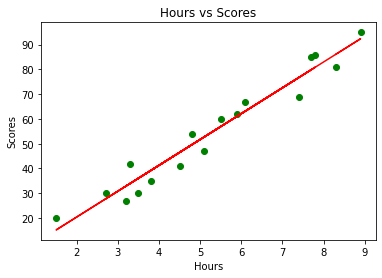

In [39]:
#To visualize the differences between actual scores and predicted scores, a scatter plot is created
#(a) Training data Scores vs Predicted Scores

plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, scores_reg.predict(x_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

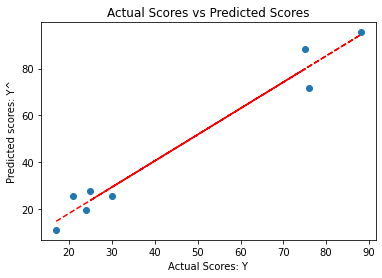

In [41]:
#(b) Testing data Scores vs Predicted Scores

x=y_test
y=y_pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [ ]:
#Model Evaluation (Actual Vs Predicted) on test sample
#We will evaluate our model using error metrics like :
#mean_absolute_error,
#mean_squared_error,
#R2_score, T-test, F-Test

In [42]:
#Mean Absolute Error

print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  5.936576124243742


In [43]:
#Root Mean Square Error

print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error :  6.665333111498132


In [44]:
#Goodness of Fit- R2

metrics.r2_score(y_test,y_pred)

0.9420584734434517

In [ ]:
#Observations
#That means that the model doing great linear model as less MAE and 
#good R-Square value

In [45]:
#T-test

from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> -0.06749127427810271
P-value --> 0.9471450243074203


In [46]:
#F-test

f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.004555072103682067
P-value --> 0.9471450243074162


In [ ]:
#SUMMARY
#The output of linear regression at 95% confident level have 1 model variable.
#The model on train dataset have good R2 value suggest the goodness of fit.
#This is futher tested on the test sample.

#In test sample R-square ,T-test, F-test were performed to measure the model
#performance in terms of goodness of fit & randomness of variance between 
#actual and the predicted values.

#In summary ,the model goodness of fit on train sample and performance of
#model on test sample are in acceptable range. The final model parameters 
#are tabled below

In [ ]:
#What will be predicted score if a student study for 9.25 hrs in a day?

In [47]:
study_hours = 9.25
score_pred = scores_reg.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


In [48]:
#ANOTHER way to calculate the SCORE OF THE STUDENT 

#Using the formula y = mx + c , where m = coeffiecient , c = intercept
y = scores_reg.coef_*9.25 + scores_reg.intercept_
y

array([96.016123])